In [4]:

import mne
from mne.preprocessing import ICA


import mtrf
from mtrf.model import TRF
from mtrf.stats import crossval, nested_crossval
import eelbrain as eel

import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.io import wavfile, loadmat, savemat
from scipy.signal import hilbert

from collections import Counter

import sys
sys.path.append('/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/utils')
from pp_utils import *
from plot_utils import *
from mTRF_utils import *
from midi_utils import *
from update_sub_lists import*
from ERP_utils import *

import pickle
import os

## Forward model

In [24]:
eeg_dir = '/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/data_preprocessed_30Hz'
mTRF_path = f'/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_mTRF_mapchange_30Hz'
sv_dir = '/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/mtrf_error_surprise/sv'

good_listen_subjects, good_motor_subjects,good_error_subjects,musicians,nonmusicians = load_subject_lists_LME()
subjects_to_process = good_error_subjects

subjects_to_process = ['08']

n_subs = len(subjects_to_process)
print('processing subjects:', subjects_to_process)

periods = ['pre']
#features = 'AM' #AM or onsets

overwrite = False
n_segments = 10
fs = 128
tmin, tmax =-0.5, 0.5  # range of time lag
regularization = 1000
#regularizations= [0.0001, 0.01, 1, 100, 10000, 1000000]


processing subjects: ['08']


In [34]:

for subject in subjects_to_process:
    for period in periods:
        eeg_path = os.path.join(eeg_dir, f'{subject}/eeg_error_{period}_{subject}.mat')
        sv_path = os.path.join(sv_dir, )

        data = loadmat(eeg_path)
        eeg = data['trial_data']

        sv_data = loadmat(os.path.join(sv_dir, f'sv_data_{period}_{subject}.mat'))

        onsets_sv = sv_data['onsets'][0] #take 0 index because it's shaped (1, n_timepoints)


        eeg_segments = segment(eeg.T, n_segments)
        onset_segments = segment(onsets_sv, n_segments) 

        #training TRF model
        fwd_trf = TRF(direction=1)

        #do crossval here
        r_fwd = crossval(fwd_trf, onset_segments, eeg_segments, fs, tmin, tmax, regularization)
        
        #fwd_trf.train(onset_segments, eeg_segments, fs, tmin, tmax, regularization = 1000)
        
        

(7680,)
(7680, 64)
Cross-validating[##################################################] 10/10



In [36]:
r_fwd

0.10333348360240131

In [33]:
r_fwd

0.10338227031791176

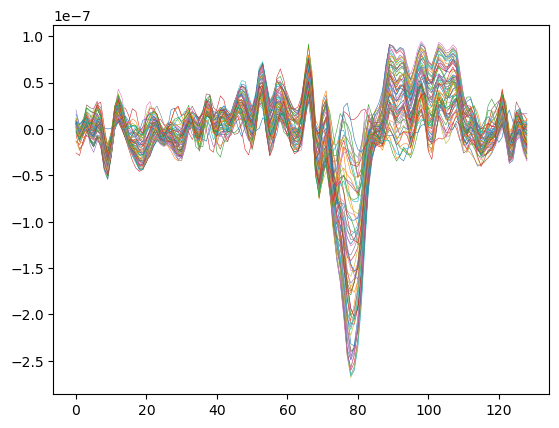

In [29]:
plt.plot(fwd_trf.weights[0], linewidth = 0.4);